<a href="https://colab.research.google.com/github/Vaibhav-sa30/Customer_Segmentation_using_Hierarchical_Clustering/blob/main/Customer_Dispersion_using_HCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title**
##****Hierarchical Clustering****
---
#**Submitted By**
####**VAIBHAV SATISH**
---
#**Submitted To**
####Coincent.ai under *Data Science with Python program*

##What is Clustering?
Clustering is a machine learning ‘technique’ that groups the data we provide such that, datapoints within a cluster are more similar to each other (or we can say homogeneous) than the datapoints from other clusters. That is, datapoints from different clusters should be as dissimilar as possible.

###Hierarchical Clustering
As the name suggests, in Hierarchical Cluster there is some sort of hierarchy maintained in the decomposition of the dataset into clusters. This hierarchical decomposition is what gives Hierarchical Clustering an edge over other clustering techniques. Because in hierarchical clustering we not just get clusters of the data, we also get extra information as in what order the algorithm formed those clusters. This extra information can be helpful in determining some relation between groups within data. That is, we get to know which group is a closer cluster to which group and what is the next closer cluster. Hierarchical Clustering shows all the possible linkages between different clusters.

####Agglomerative Clustering
This bottom up algorithm treat each datapoint as a single cluster at the initial step and then successively merge (or agglomerate) pairs of clusters until all clusters have been merged into a single cluster that contains all datapoints.
Bottom up hierarchical clustering is therefore called  Hierarchical Agglomerative Clustering or HAC.

Checkout the [complete project walkthrough on My Website](https://sites.google.com/view/vaibhavsatish/home)

Give a read to [Broad Brush on HAC from My Blog](https://vaibhavsatish.substack.com/p/learn-and-implement-hierarchical)

[Link to Dataset](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

Scikit Learn hierarchical Clustering [Documentation link](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)

## Import required library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

### Importing the data from CSV file

First we read the data from the dataset using read_csv from the pandas library.


In [ ]:
data = pd.read_csv('/content/Mall_Customers.csv')

FileNotFoundError: ignored

Viewing the data that we imported to pandas dataframe object

In [ ]:
data


##Viewing and Describing data

Now we view the Head and Tail of the data using head() and tail() respectively.

In [ ]:
data.head()

In [ ]:
data.tail()

Checking the dimensions/shape of the dataset using shape.


In [ ]:
data.shape

NameError: ignored

Viewing Column names of the dataset using columns

In [ ]:
data.columns


In [ ]:
for i, col in enumerate(data.columns):
  print(f'Column number {i+1} is {col}')

Describing the data as basic statistics using describe()

In [ ]:
data.describe()

In [ ]:
data.columns[4]

##Data Cleaning
Checking the data for inconsistencies and further cleaning the data if needed.

Checking data for missing values using isnull()

In [ ]:
data.isnull()

Checking summary of missing values

In [ ]:
data.isnull().sum()

The 'customer_id' column has no relevence therefore deleting it would be better.

Deleting 'customer_id' colummn using drop().

In [ ]:
data = data.drop('CustomerID',axis =1)
data.head()

The 'Annual income' and 'Spending score' columns have spaces in their column names, we need to rename them.

Cleaning the data labels (Annual income and Spending Score) using rename().

In [ ]:
data = data.rename(columns = {'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'})
data.head()

##Understanding and Visualizing Data

Finding and viewing Corelations in the data and columns using corr()

In [ ]:
corr = data.corr()
corr

Plotting the heatmap of correlation of all the columns of the dataset.

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.heatmap(corr, cmap = 'Reds', annot = True, linewidths=0.5, linecolor='black')
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

##Analyzing Data for Modelling

###Analyzing Annual Income

First we look at the 'Annual Income' column.

In [ ]:
data['Annual_Income'].head()

Statistical data about Annual Income column.

In [ ]:
data['Annual_Income'].describe()

Visualizing statistical data about Annual Income column on a boxplot.

In [ ]:
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=c_data["Annual_Income"], color="#f73434")
ax.axhline(y=c_data["Annual_Income"].max(), linestyle='--',color='#c90404', label=f'Max Income ({c_data.Annual_Income.max()})')
ax.axhline(y=c_data["Annual_Income"].describe()[6], linestyle='--',color='#f74343', label=f'75% Income ({c_data.Annual_Income.describe()[6]:.2f})')
ax.axhline(y=c_data["Annual_Income"].median(), linestyle='--',color='#eb50db', label=f'Median Income ({c_data.Annual_Income.median():.2f})')
ax.axhline(y=c_data["Annual_Income"].describe()[4], linestyle='--',color='#eb50db', label=f'25% Income ({c_data.Annual_Income.describe()[4]:.2f})')
ax.axhline(y=c_data["Annual_Income"].min(), linestyle='--',color='#046ebf', label=f'Min Income ({c_data.Annual_Income.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Annual Income (in Thousand USD)', fontsize = 20)
plt.show()

Distribution of Annual Income counts.

In [ ]:
c_data['Annual_Income'].value_counts().head()

Visualizing Annual Income count value distribution on a histogram.

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.histplot(data['Annual_Income'], bins=15, ax=ax, color=['orange'])
ax.set_xlabel('Annual Income (in Thousand USD)')
plt.title('Annual Income count Distribution of Customers', fontsize = 20)
plt.show()

Visualizing Annual Income per Age on a Scatterplot.

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Annual_Income'], x=data['Age'], color='#f73434', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income per Age', fontsize = 20)
plt.show()

####Annual Income per Gender.

Statistical data about the Annual Income of male customer.

In [ ]:
data[data['Gender']=='Male'].Annual_Income.describe()

Statistical data about the Annual Income of female customer.

In [ ]:
data[data['Gender']=='Female'].Annual_Income.describe()

Visualizing statistical difference of Annual Income between Male and Female Customers.

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(x=data['Gender'], y=data["Annual_Income"], hue=data['Gender'], palette='seismic')
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income Distribution by Gender', fontsize = 20)
plt.show()

Visualizing annual Income per Age by Gender on a scatterplot.

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Annual_Income'], x=data['Age'], hue=data['Gender'], palette='seismic', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Annual Income (in Thousand USD)')
ax.legend(loc ='upper right')

plt.title('Annual Income per Age by Gender', fontsize = 20)
plt.show()

Visualizing difference of Annual Income between Male and Female Customers using Violin Plot.

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.violinplot(y=data['Annual_Income'],x=data['Gender'])
ax.set_ylabel('Annual Income (in Thousand USD)')

plt.title('Annual Income Distribution by Gender', fontsize = 20)
plt.show()

###Analyzing Spending Score Data

First we look at the Spending Score column.

In [ ]:
data['Spending_Score'].head()

Statistical Data of Spending Scores Column.

In [ ]:
data['Spending_Score'].describe()

Visualizing statistical data about Spending score column on a boxplot.

In [ ]:
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=data['Spending_Score'], color="#f73434")
ax.axhline(y=data['Spending_Score'].max(), linestyle='--',color='#c90404', label=f'Max Spending ({data.Spending_Score.max()})')
ax.axhline(y=data['Spending_Score'].describe()[6], linestyle='--',color='#f74343', label=f'75% Spending ({data.Spending_Score.describe()[6]:.2f})')
ax.axhline(y=data['Spending_Score'].median(), linestyle='--',color='#eb50db', label=f'Median Spending ({data.Spending_Score.median():.2f})')
ax.axhline(y=data['Spending_Score'].describe()[4], linestyle='--',color='#eb50db', label=f'25% Spending ({data.Spending_Score.describe()[4]:.2f})')
ax.axhline(y=data['Spending_Score'].min(), linestyle='--',color='#046ebf', label=f'Min Spending ({data.Spending_Score.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('Spending Score')

plt.title('Spending Score', fontsize = 20)
plt.show()

Visualizing Spending Scores per Age on a scatterplot.

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Spending_Score'], x=data['Age'], s=70, color='#f73434', edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')

plt.title('Spending Scores per Age', fontsize = 20)
plt.show()

####Spending Scores per Gender
Statistical data of Spending Score of male customer.

In [ ]:
data[data['Gender']=='Male'].Spending_Score.describe()

Statistical data of Spending Score of female customer.

In [ ]:
data[data['Gender']=='Female'].Spending_Score.describe()

Visualizing statistical difference of Spending Score between Male and Female Customers.

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(x=data['Gender'], y=data["Spending_Score"], hue=data['Gender'], palette='seismic')
ax.set_ylabel('Spending Score')

plt.title('Spending Score Distribution by Gender', fontsize = 20)
plt.show()

Visualizing Spending Score per Age by Gender on a scatterplot.

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=data['Spending_Score'], x=data['Age'], hue=data['Gender'], palette='seismic', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')
ax.legend(loc ='upper right')

plt.title('Spending Score per Age by Gender', fontsize = 20)
plt.show()

Visualizing difference of Spending Score between Male and Female Customers using Violin Plot.

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.violinplot(y=data['Spending_Score'],x=data['Gender'])
ax.set_ylabel('Spending Scores')

plt.title('Spending Score distribution by Gender', fontsize = 20)
plt.show()

##Hierarchical Agglomerative Cluster Analysis

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from sklearn.datasets import make_blobs
dataset= make_blobs(n_samples = 200,
                    n_features = 2,
                    centers = 5,
                    cluster_std = 1.6,
                    random_state = 50)

We will now view and select the data that we need for clustering.

In [ ]:
clustering_data = data.iloc[:,[2,3]].values
clustering_data

###Dendogram to find optimal number of clusters

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(clustering_data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

###How to choose optimal number of clusters?

Cut the dendrogram where the gap between two successive combination similarities is largest.

That is, we cut the dendrogram through the longest vertical line to get good enough number of cluster, such that no horizontal line is cutting the longest vertical line.


From the dendrogram we got above, we notice that:

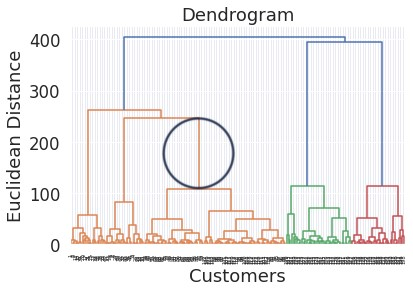

Circled line is the only vertical line that is the longest and not being cut by any neighboring horizontal line.

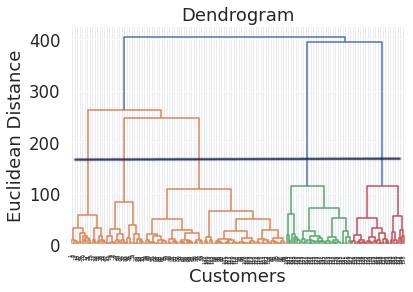

So, we draw a horizontal line through this line and observe all the vertical lines our horizontal line is intersecting.

We notice that our horizontal line is intersecting 5 vertical lines.

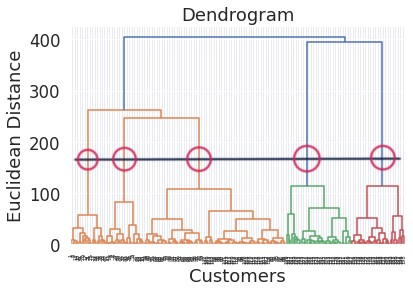

**Hence, the number of optimal clusters are 5 for the given data.**

###Train the model

In [ ]:
clustering = AgglomerativeClustering(n_clusters = 5).fit(clustering_data)
y_hc = clustering.fit_predict(clustering_data)

####Predicted Values

In [ ]:
y_hc

In [ ]:
clusters = clustering_data.copy()
#Transform this copy of clustering data 'array' to 'DataFrame' so that predicted values can be appended to it.
clusters = pd.DataFrame(clusters, columns=['Annual_Income', 'Spending_Score'])
#Append Cluster Predictions columns to this new copy of clustering data
clusters['Cluster_Prediction'] = clustering.fit_predict(clustering_data)
clusters.head()

###Visualizing the clusters

In [ ]:
unique_values = np.unique(y_hc)
for value in unique_values:
  plt.scatter(clustering_data[y_hc == value,0], clustering_data[y_hc == value, 1], label = 'Cluster {}'.format(value+1))
plt.title('Cluster of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(bbox_to_anchor =(1., 0.85), ncol = 1) #bbox_to_anchor shows the position of legend *outside* the graph and
                                                 #ncol denotes the number of columns in the legend
plt.show()

##Observations and Inferences

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,20))

#Subplot for cluster 1
ax[0,0].scatter(x=clusters.loc[clusters['Cluster_Prediction'] == 0]['Annual_Income'],
            y=clusters.loc[clusters['Cluster_Prediction'] == 0]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='blue', label='Cluster 1')

ax[0,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 1')


#Subplot for cluster 2
ax[0,1].scatter(x=clusters.loc[clusters['Cluster_Prediction'] == 1]['Annual_Income'],
            y=clusters.loc[clusters['Cluster_Prediction'] == 1]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 2')

ax[0,1].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 2')


#Subplot for cluster 3
ax[1,0].scatter(x=clusters.loc[clusters['Cluster_Prediction'] == 2]['Annual_Income'],
            y=clusters.loc[clusters['Cluster_Prediction'] == 2]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.2, c='green', label='Cluster 3')

ax[1,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 3')


#Subplot for cluster 4
ax[1,1].scatter(x=clusters.loc[clusters['Cluster_Prediction'] == 3]['Annual_Income'],
            y=clusters.loc[clusters['Cluster_Prediction'] == 3]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')
ax[1,1].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 4')


#Subplot for cluster 5
ax[2,0].scatter(x=clusters.loc[clusters['Cluster_Prediction'] == 4]['Annual_Income'],
            y=clusters.loc[clusters['Cluster_Prediction'] == 4]['Spending_Score'],
            s=40,edgecolor='black', linewidth=0.3, c='purple', label='Cluster 5')

ax[2,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 5')

fig.delaxes(ax[2,1])
fig.legend(loc='right')
fig.suptitle('Individual Clusters')
plt.show()

#####Cluster 1 - Navy Blue (Misers)
*Misers meaning: People who hoard money and spends as little as possible*

**These are customers with high annual income but low spending score.**

**Inference:** These could be the customers that are not much satisfied with the mall products or services.

**Target potential:** Quite High as these customers have potential to spend more money.


Cluster 2 - Orange (Normal Customers)

**Inference:** These are the customers with average Annual Income and Spending Score which seems most in frequency.

**Target Potential:** Not Much as there will always be a high number of average customers but different data analysis techniques can be used to increase the spending scores of average customers


Cluster 3 - Green (Lavish)

**Inference:** These are the customers whose Annual Income is High so is their Spending Score. These people might be the regular customers of the mall and are convinced by the mall’s facilities

**Target Potential:** Very High. People with high income and high spending scores creates an ideal case for the mall or shops as these people are the prime sources of profit.

Cluster 4 - Red (Spendthrift)

**Inference:** These are the customers with relatively low annual income but have high spending score. They probably are extremely satisfied with the mall facilities or just love to shop.

**Target Potential:** High. These customers can also be treated as potential target but they can be unpredictive. So mall or shop owner might not proactively target these people but still will try not to lose them.

Cluster 5 - Purple (Balanced Customers)

**Inference:** These are the customers who have low Annual income and low spending which makes sense.

**Target Potential:** Very Low. Mall or shop owners will be less interested in this segment of customers.

##Conclusion and Recommendations for Mall/Shop/Business Owner


After working with the Mall customers data containing information regarding their Customer_ID, Age, Gender, Annual Income, and their Spending Score. And analyzing the features Annual Income and Spending Score of customers using an unsupervised machine learning algorithm i.e., Hierarchical Clustering, It can be safely recommended that Mall owners should focus heavily on customers with high spending score. As they are the direct influencers of business profitability.

An indirect influence to profitability of business could be the segment of customers whose Spending Score is not high enough but they earn a lot annually. These could be potential target as they are more probable to spend more if the right facilities and products are provided to them. Without analysis this specific customer segment could have been overlooked, causing potential profit opportunity lost.

Hence, business owner should concentrate their marketing heavily upon these targeted segments of the customers. Marketing could involve from a wide range of options such as improving facilities that attracts these customers, collecting more information regarding their product preferences and update the inventory pertaining to the same, providing incentives to spend more to these customers, etc.

This is how powerful data analysis for businesses can be. And this is really just tip of the iceberg. There is so much more that can be done with business or any data which can make us take better decisions for more profitable future.

Checkout the [complete project walkthrough on My Website](https://sites.google.com/student.onlinedegree.iitm.ac.in/vaibhavsatish/home/heirarchical-cluster-analysis?authuser=1)

Give a read to [Broad Brush on HAC from My Blog](https://vaibhavsatish.substack.com/p/learn-and-implement-hierarchical)

[Link to Dataset](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

Scikit Learn hierarchical Clustering [Documentation link](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)

#Thank You!